<a href="https://colab.research.google.com/github/preethi63790/TASK-4/blob/main/TASK4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Confusion Matrix:
 [[70  1]
 [ 2 41]]
Precision: 0.9761904761904762
Recall: 0.9534883720930233
ROC-AUC Score: 0.99737962659679


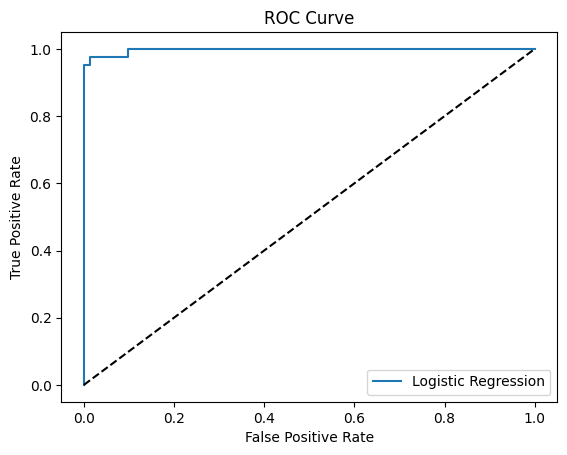


With threshold = 0.3
Confusion Matrix:
 [[67  4]
 [ 1 42]]
Precision: 0.9130434782608695
Recall: 0.9767441860465116


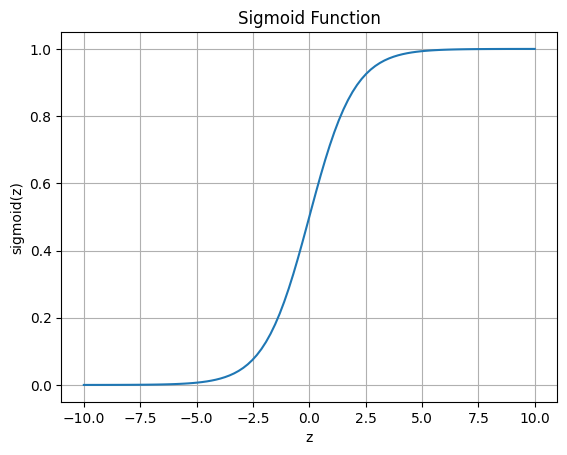

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix, precision_score, recall_score,
    roc_auc_score, roc_curve
)
df = pd.read_csv("/content/data.csv")
X = df.drop(['diagnosis', 'id', 'Unnamed: 32'], axis=1)
y = df['diagnosis']
X = X.fillna(X.mean())
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = LogisticRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, pos_label='M'))
print("Recall:", recall_score(y_test, y_pred, pos_label='M'))
y_test_numeric = y_test.apply(lambda x: 1 if x == 'M' else 0)
print("ROC-AUC Score:", roc_auc_score(y_test_numeric, y_prob))
fpr, tpr, _ = roc_curve(y_test_numeric, y_prob)
plt.plot(fpr, tpr, label='Logistic Regression')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()
threshold = 0.3
y_pred_threshold = (y_prob >= threshold).astype(int)
y_test_numeric_threshold = y_test.apply(lambda x: 1 if x == 'M' else 0)
print(f"\nWith threshold = {threshold}")
print("Confusion Matrix:\n", confusion_matrix(y_test_numeric_threshold, y_pred_threshold))
print("Precision:", precision_score(y_test_numeric_threshold, y_pred_threshold))
print("Recall:", recall_score(y_test_numeric_threshold, y_pred_threshold))
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
z = np.linspace(-10, 10, 100)
sigmoid_values = sigmoid(z)
plt.plot(z, sigmoid_values)
plt.title("Sigmoid Function")
plt.xlabel("z")
plt.ylabel("sigmoid(z)")
plt.grid(True)
plt.show()